In [34]:
 # Import relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.dates import *

In [15]:
# Read the files from the current working directory
weather = pd.read_csv('ny_hourly.csv',
                     parse_dates=[['date', 'TimeEST']],
                     usecols=['date', 'TimeEST', 'TemperatureF', 'Dew PointF', 'Humidity'])


# View the DataFrame
weather.describe()


,TemperatureF,Dew PointF,Humidity
count,5141.000000,5141.000000,5137.000000
mean,42.943649,27.130247,58.341250
std,280.702231,280.354764,20.746395
min,-9999.000000,-9999.000000,9.000000
25%,37.900000,23.000000,42.000000
50%,50.000000,35.100000,55.000000
75%,63.000000,48.000000,78.000000
max,90.000000,69.800000,100.000000


In [17]:
# Filter the data to limit outliers
weather = weather[weather['TemperatureF'] > -100]
weather = weather.sort_values('date_TimeEST')

# View the DataFrame
weather.describe()

,TemperatureF,Dew PointF,Humidity
count,5137.000000,5137.000000,5137.000000
mean,50.762955,34.937240,58.341250
std,16.051068,17.603468,20.746395
min,-0.900000,-18.900000,9.000000
25%,37.900000,23.000000,42.000000
50%,50.000000,35.100000,55.000000
75%,63.000000,48.000000,78.000000
max,90.000000,69.800000,100.000000


Text(0.5, 1.0, 'Hourly Weather in New York')

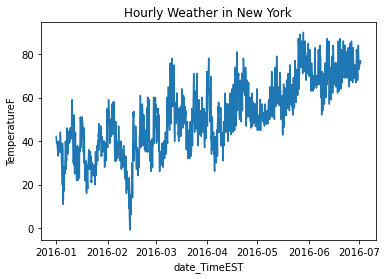

In [18]:
# Draw a line by specifying the axes
sns.lineplot(x='date_TimeEST', y='TemperatureF',
             data=weather).set_title('Hourly Weather in New York')

Text(0.5, 1.0, 'Hourly Weather in New York')

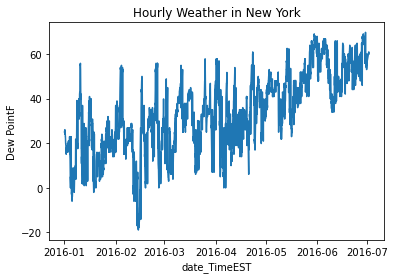

In [26]:
# Line plot with Dew point
sns.lineplot(x='date_TimeEST',
             y='Dew PointF',
             data=weather).set_title('Hourly Weather in New York')

Text(0.5, 1.0, 'Hourly Weather in New York')

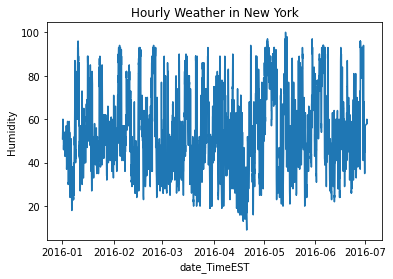

In [25]:
# Line plot with humidity
sns.lineplot(x='date_TimeEST',
             y='Humidity',
             data=weather).set_title('Hourly Weather in New York')

/var/folders/nk/m613fynd7jb1413x2hnqtv6m0000gn/T/ipykernel_80094/2231342035.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation=45)


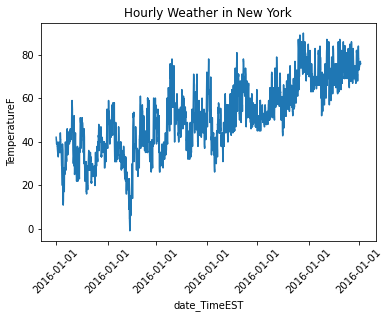

In [30]:
# Rotate the axis
fig, ax = plt.subplots()
sns.lineplot(x='date_TimeEST',
             y='TemperatureF',
             data=weather).set_title('Hourly Weather in New York')
x_labels = weather['date_TimeEST'].dt.strftime('%Y-%m-%d')
ax.set_xticklabels(x_labels, rotation=45)
plt.show()

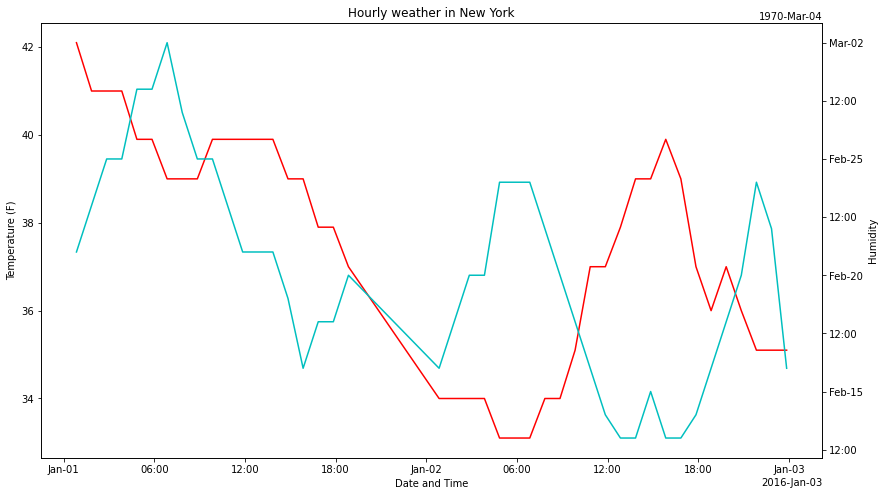

In [46]:
# Setting up the line chart
january = weather[weather['date_TimeEST'] < np.datetime64('2016-01-03')]
fig, temp_ax = plt.subplots()
fig.set_size_inches(14, 8)
humid_ax = temp_ax.twinx()

# Axis titles
temp_ax.set_title('Hourly weather in New York')
temp_ax.set_xlabel('Date and Time')
temp_ax.set_ylabel('Temperature (F)')
humid_ax.set_ylabel('Humidity')

# Formatting the axis
major_locator = AutoDateLocator()
formatter = ConciseDateFormatter(major_locator)
temp_ax.xaxis.set_major_formatter(formatter)
humid_ax.yaxis.set_major_formatter(formatter)

# Creating the line charts
temp_lines = temp_ax.plot(january["date_TimeEST"], january['TemperatureF'], "r")
humid_lines = humid_ax.plot(january["date_TimeEST"], january['Humidity'], "c")

